# Formaterer Dataen som i Del 1

In [54]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filnavn = '../data/table.csv' 
data = pd.read_csv(filnavn, sep=";", engine='python') #leser inn dataen fra filen.

# Fjerne eventuelle skjulte tegn
data.columns = data.columns.str.replace("\ufeff", "").str.strip()

# Konvertere relevante kolonner til numerisk format
data["Høyeste vindkast (1 t)"] = [
    float(x.replace(",", ".")) if isinstance(x, str) else x 
    for x in data["Høyeste vindkast (1 t)"]
]

data["Lufttemperatur"] = [
    float(x.replace(",", ".")) if isinstance(x, str) else x 
    for x in data["Lufttemperatur"]
]

# Konvertere 'Tid(norsk normaltid)' til datetime-format
data["Tid(norsk normaltid)"] = [pd.to_datetime(t, format="%d.%m.%Y %H:%M") for t in data["Tid(norsk normaltid)"]]


# Dataanalyse

In [55]:
mean_vind = data["Høyeste vindkast (1 t)"].mean() #regner ut gjennomsnittet av høyeste vindkast
print("Gjennomsnittlig høyeste vindkast (1 t):", mean_vind)
#regner ut gjennomsnittet av høyeste vindkast med numpy for å vise hvordan numpy kan brukes
mean_vind_npy = np.mean(data["Høyeste vindkast (1 t)"]) 
print("Gjennomsnittlig høyeste vindkast (1 t) med numpy:", mean_vind_npy)
print()

std_vind = data["Høyeste vindkast (1 t)"].std() #regner ut standardavviket av høyeste vindkast
print("Standardavvik av høyeste vindkast (1 t):", std_vind)
median_vind = data["Høyeste vindkast (1 t)"].median() #regner ut medianen av høyeste vindkast
print("Median av høyeste vindkast (1 t):", median_vind)
print()

mean_temp = data["Lufttemperatur"].mean() #regner ut gjennomsnittet av lufttemperatur
print("Gjennomsnittlig lufttemperatur:", mean_temp)
std_temp = data["Lufttemperatur"].std() #regner ut standardavviket av lufttemperatur    
print("Standardavvik av lufttemperatur:", std_temp)
median_temp = data["Lufttemperatur"].median() #regner ut medianen av lufttemperatur
print("Median av lufttemperatur:", median_temp)



Gjennomsnittlig høyeste vindkast (1 t): 11.288067665758401
Gjennomsnittlig høyeste vindkast (1 t) med numpy: 11.288067665758401

Standardavvik av høyeste vindkast (1 t): 5.776701283915553
Median av høyeste vindkast (1 t): 10.5

Gjennomsnittlig lufttemperatur: 3.7922116257947325
Standardavvik av lufttemperatur: 7.034264189153865
Median av lufttemperatur: 3.0


In [56]:
#Enkel Statisktisk analyse av dataene
summary = data[["Høyeste vindkast (1 t)","Lufttemperatur"]].describe() #regner ut beskrivende statistikk av dataene
print(summary)   

       Høyeste vindkast (1 t)  Lufttemperatur
count             8808.000000     8808.000000
mean                11.288068        3.792212
std                  5.776701        7.034264
min                  0.900000      -15.700000
25%                  7.100000       -1.200000
50%                 10.500000        3.000000
75%                 14.400000        8.100000
max                 39.200000       28.800000


# Visualisering

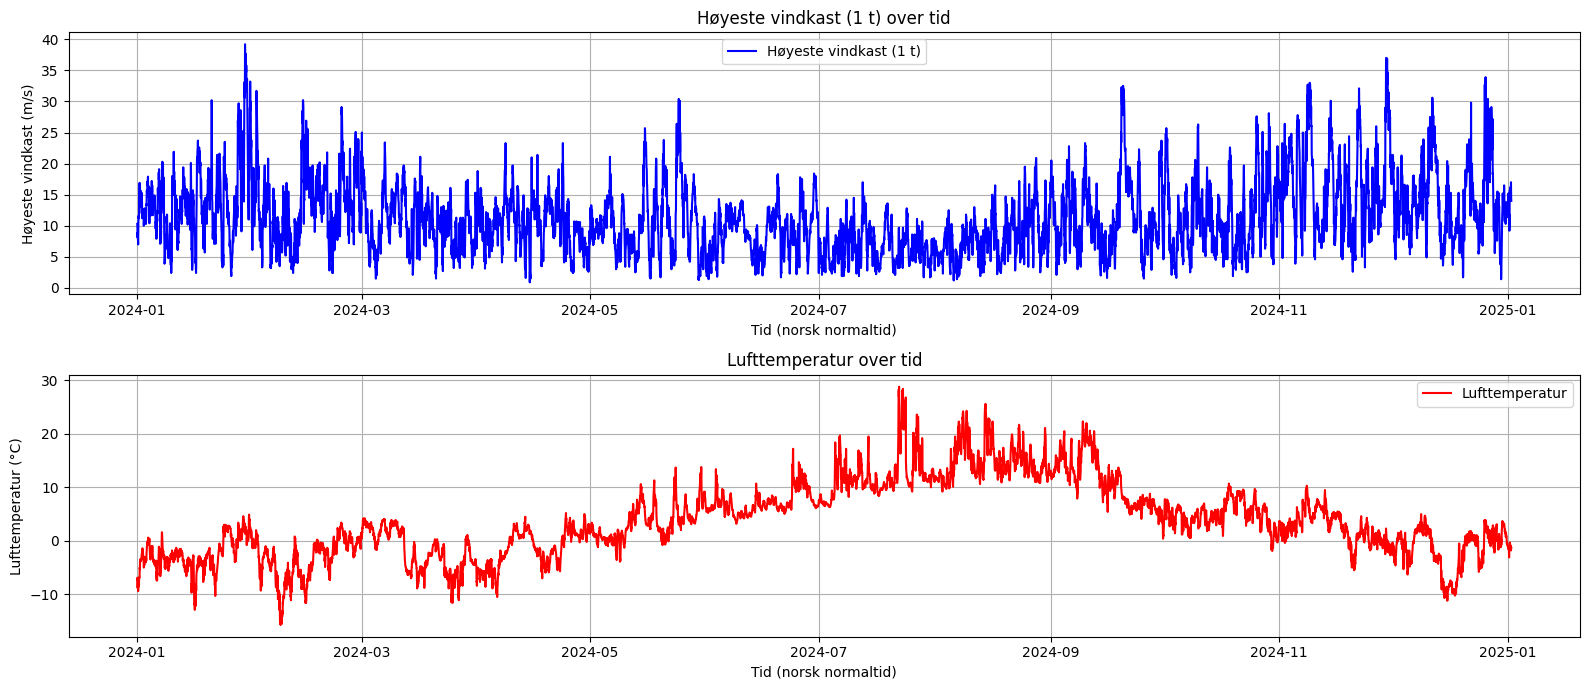

In [57]:
#Plotting "Høyeste vindkast (1 t)" og "Lufttemperatur" over tid
plt.figure(figsize=(16, 7))

#Plot for "Høyeste vindkast (1 t)"
plt.subplot(2, 1, 1)
plt.plot(data["Tid(norsk normaltid)"], data["Høyeste vindkast (1 t)"], label="Høyeste vindkast (1 t)", color="blue")
plt.title("Høyeste vindkast (1 t) over tid")
plt.xlabel("Tid (norsk normaltid)")
plt.ylabel("Høyeste vindkast (m/s)")
plt.grid(True)
plt.legend()

# Plot for "Lufttemperatur"
plt.subplot(2, 1, 2)
plt.plot(data["Tid(norsk normaltid)"], data["Lufttemperatur"], label="Lufttemperatur", color="red")
plt.title("Lufttemperatur over tid")
plt.xlabel("Tid (norsk normaltid)")
plt.ylabel("Lufttemperatur (°C)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

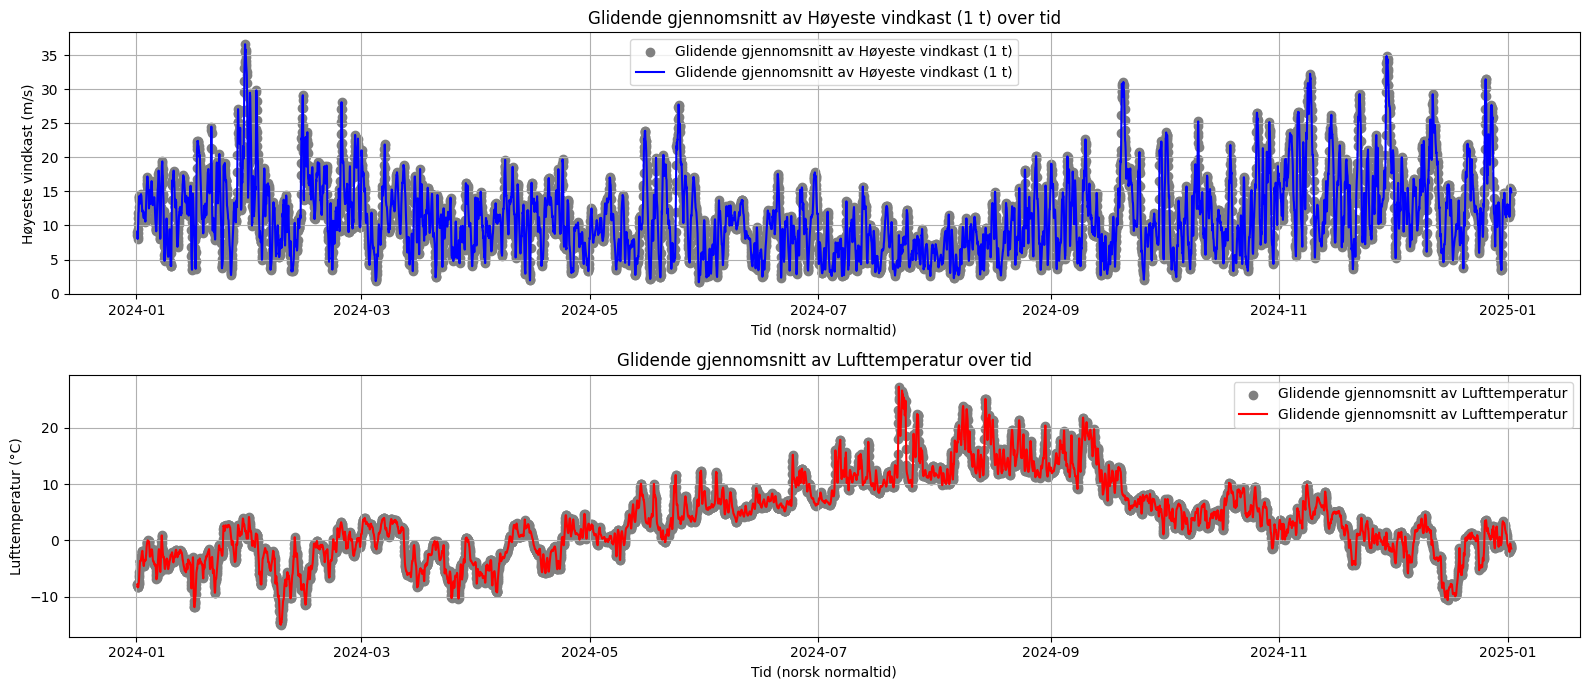

In [58]:
#Tar i bruk moving average for å håndtere manglende data og glatte ut kurvene
#Definerer en funksjon for å beregne glidende gjennomsnitt
def moving_average(signal, window_size):
    return np.convolve(signal, np.ones(window_size)/window_size, mode='valid')

window_size = 5 # Definerer vinduets størrelse for glidende gjennomsnitt
moving_avg_vind = moving_average(data["Høyeste vindkast (1 t)"], window_size)
moving_avg_temp = moving_average(data["Lufttemperatur"], window_size)

# Plotting glidende gjennomsnitt
plt.figure(figsize=(16, 7))
plt.subplot(2, 1, 1)
plt.scatter(data["Tid(norsk normaltid)"][window_size-1:], moving_avg_vind, label="Glidende gjennomsnitt av Høyeste vindkast (1 t)", color="grey")
plt.plot(data["Tid(norsk normaltid)"][window_size-1:], moving_avg_vind, label="Glidende gjennomsnitt av Høyeste vindkast (1 t)", color="blue")
plt.title("Glidende gjennomsnitt av Høyeste vindkast (1 t) over tid")
plt.xlabel("Tid (norsk normaltid)")
plt.ylabel("Høyeste vindkast (m/s)")
plt.grid(True)
plt.legend()

# Plotting glidende gjennomsnitt for lufttemperatur 
plt.subplot(2, 1, 2)
plt.scatter(data["Tid(norsk normaltid)"][window_size-1:], moving_avg_temp, label="Glidende gjennomsnitt av Lufttemperatur", color="grey")
plt.plot(data["Tid(norsk normaltid)"][window_size-1:], moving_avg_temp, label="Glidende gjennomsnitt av Lufttemperatur", color="red")
plt.title("Glidende gjennomsnitt av Lufttemperatur over tid")
plt.xlabel("Tid (norsk normaltid)")
plt.ylabel("Lufttemperatur (°C)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()



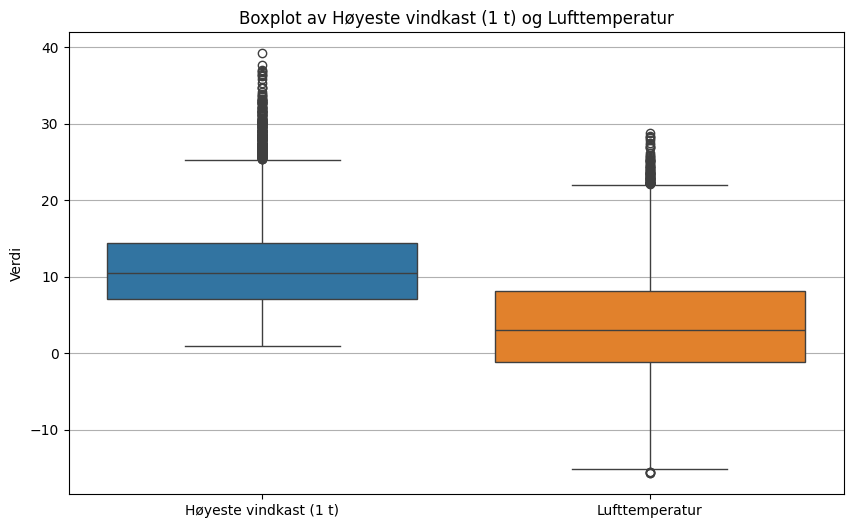

In [59]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=data[["Høyeste vindkast (1 t)", "Lufttemperatur"]])
plt.title("Boxplot av Høyeste vindkast (1 t) og Lufttemperatur")
plt.ylabel("Verdi")
plt.grid(axis="y")
plt.show()

In [60]:
# Importerer nødvendige biblioteker for regresjonsanalyse
from sklearn.linear_model import LinearRegression

start_time = data["Tid(norsk normaltid)"].min() #regner ut starttidspunktet for dataene
data["Tid(norsk normaltid)"] = (data["Tid(norsk normaltid)"] - start_time).dt.total_seconds() / 3600 #konverterer tid til timer fra starttidspunktet

# Rydder data ved å fjerne rader med NaN-verdier i de relevante kolonnene som er nødvendig for å unngå feil under regresjonsanalysen
data_clean_vind = data.dropna(subset=["Høyeste vindkast (1 t)"])
data_clean_temp = data.dropna(subset=["Lufttemperatur"])

reg_vind = LinearRegression()
reg_temp = LinearRegression()

# Fit the models
reg_vind.fit(data_clean_vind[["Tid(norsk normaltid)"]], data_clean_vind["Høyeste vindkast (1 t)"])
reg_temp.fit(data_clean_temp[["Tid(norsk normaltid)"]], data_clean_temp["Lufttemperatur"])  


print(reg_vind.intercept_, reg_vind.coef_)
print(reg_temp.intercept_, reg_temp.coef_)



10.532077032108088 [0.00017168]
-0.62684664010437 [0.00100353]


c:\Users\tager\OneDrive\NTNU\TDT4114\ANV_prosjekt-1\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\tager\OneDrive\NTNU\TDT4114\ANV_prosjekt-1\venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


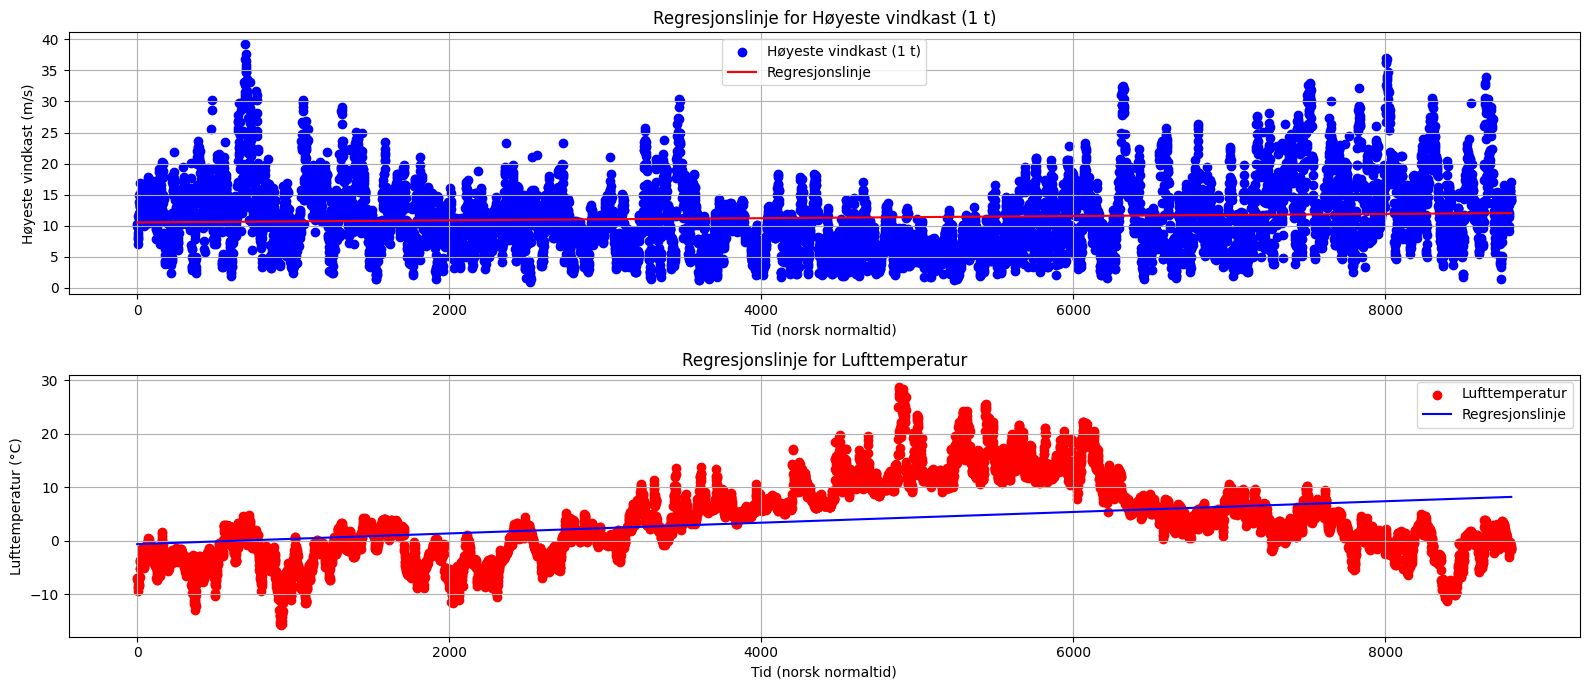

In [61]:
#Plotte regresjonslinjen mot dataene

# Normalize the "Tid(norsk normaltid)" column for regression
time_vind = data_clean_vind["Tid(norsk normaltid)"].to_numpy().reshape(-1, 1)
time_temp = data_clean_temp["Tid(norsk normaltid)"].to_numpy().reshape(-1, 1)

# Predict using the normalized time values
x_vind = reg_vind.predict(time_vind)
x_temp = reg_temp.predict(time_temp)

plt.figure(figsize=(16, 7))
plt.subplot(2, 1, 1) 
plt.scatter(data["Tid(norsk normaltid)"], data["Høyeste vindkast (1 t)"], label="Høyeste vindkast (1 t)", color="blue")
plt.plot(data_clean_vind["Tid(norsk normaltid)"], x_vind, label="Regresjonslinje", color="red")
plt.title("Regresjonslinje for Høyeste vindkast (1 t)")
plt.xlabel("Tid (norsk normaltid)")
plt.ylabel("Høyeste vindkast (m/s)")
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.scatter(data["Tid(norsk normaltid)"], data["Lufttemperatur"], label="Lufttemperatur", color="red")
plt.plot(data_clean_temp["Tid(norsk normaltid)"], x_temp, label="Regresjonslinje", color="blue")
plt.title("Regresjonslinje for Lufttemperatur")
plt.xlabel("Tid (norsk normaltid)")
plt.ylabel("Lufttemperatur (°C)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()